# Example combining forecast and measurement data

In [15]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import json
import datetime
import os

In [16]:
from indralib.indra_event import IndraEvent
from indralib.indra_client import IndraClient
from indralib.indra_time import IndraTime

# This allows asyncio usage in notebooks:
import nest_asyncio
nest_asyncio.apply()

In [17]:
ic = IndraClient()

In [18]:
await ic.init_connection()

### `stat_client_creds.json` format

```json
{
    "username": "my-username",
    "password": "my-password",
    "timezone": "Europe/Berlin"
}
```

In [19]:
with open (os.path.expanduser("~/.config/indrajala/stat_client_creds.json"), 'r') as f:
    creds = json.load(f)
    

In [20]:
ret = await ic.login_wait(username=creds['username'], password=creds['password'])

In [21]:
ie = await ic.get_wait_last_event(domain="$event/forecast/temperature/dwd/10865")

In [22]:
dt = json.loads(ie.data)

In [23]:
x=[]
y=[]
for di in dt:
    lt = IndraTime.julian_to_datetime(di[0]).astimezone(tz=None)  # local time
    x.append(lt)
    y.append(di[1])

In [24]:
dt2 = await ic.get_wait_history(domain="$event/measurement/temperature/climate/uni_muc", start_time=IndraClient.get_current_time_jd()-2)

In [25]:
x2=[]
y2=[]
for di in dt2:
    x2.append(IndraTime.julian_to_datetime(di[0]).astimezone(tz=None))  # local time)
    y2.append(di[1])

In [37]:
dt3 = await ic.get_wait_history(domain="$event/measurement/temperature/climate/home_balkon_ha", start_time=IndraClient.get_current_time_jd()-2, sample_size=200, mode='Sample')

In [38]:
print(len(dt3))

200


In [39]:
x3=[]
y3=[]
for di in dt3:
    x3.append(IndraTime.julian_to_datetime(di[0]).astimezone(tz=None))  # local time)
    y3.append(di[1])

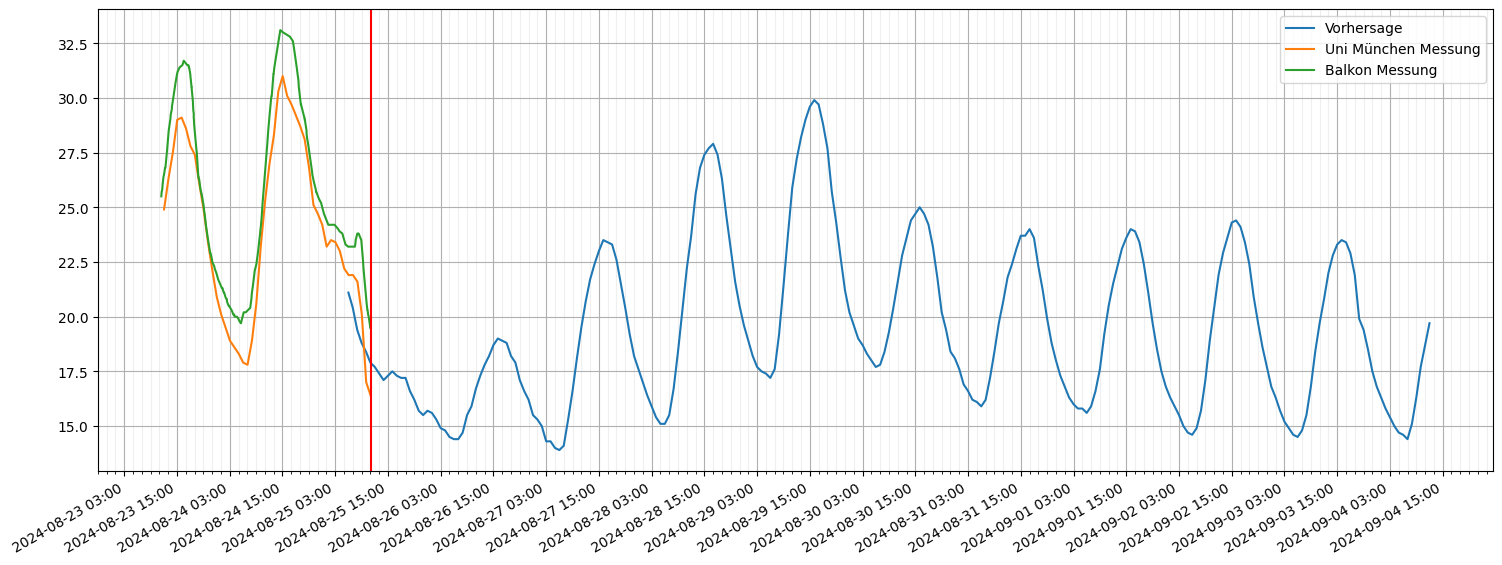

In [40]:
fig, axs = plt.subplots(figsize=(18,6))
ax = axs
ax.grid(True, which='minor', alpha=0.2)
ax.grid(True, which='major')
plt.plot(x,y, label='Vorhersage')
plt.plot(x2,y2, label='Uni München Messung')
# plt.plot(x2,y2, '+')
plt.plot(x3,y3, label='Balkon Messung')
# plt.plot(x,y,'+')
plt.axvline(datetime.datetime.now().astimezone(tz=None), color='r')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M', tz=creds['timezone']))  # timezone of client, e.g. 'Europe/Berlin', so plot uses local time and not UTC
ax.xaxis.set_minor_locator(mdates.HourLocator(interval = 2))
ax.xaxis.set_major_locator(mdates.HourLocator(interval = 12))
plt.legend()
# Rotates and right-aligns the x labels so they don't crowd each other.
for label in ax.get_xticklabels(which='major'):
    label.set(rotation=30, horizontalalignment='right')

In [29]:
import datetime
datetime.datetime.now(tz=datetime.timezone.utc).astimezone()

datetime.datetime(2024, 8, 25, 11, 10, 34, 493594, tzinfo=datetime.timezone(datetime.timedelta(seconds=7200), 'CEST'))